In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#display dataset statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#display info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#check number or samples for each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
#check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

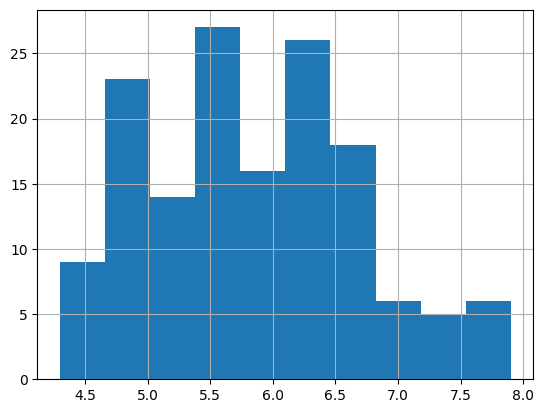

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

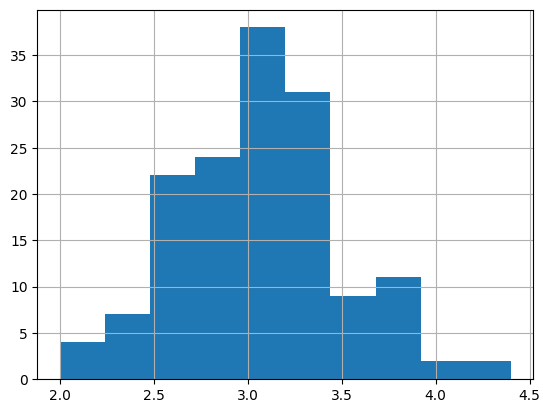

In [10]:
#histogram
df['SepalWidthCm'].hist()

<Axes: >

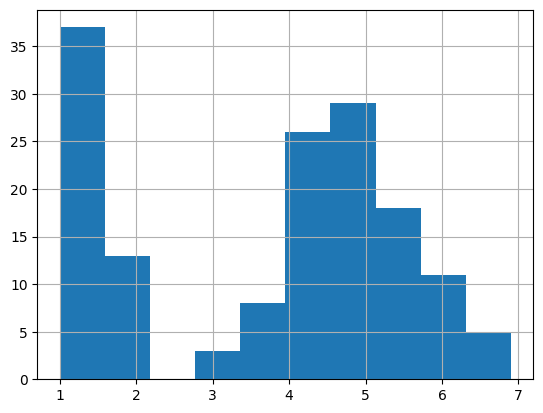

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

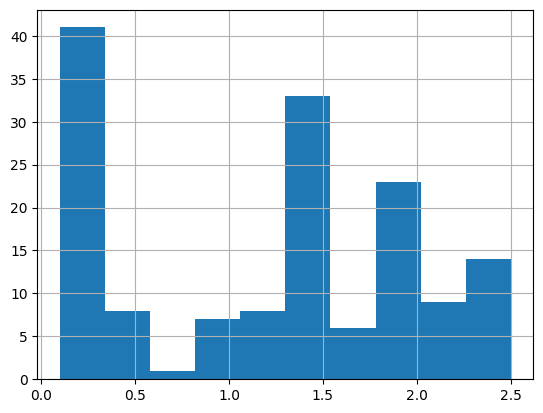

In [12]:
df['PetalWidthCm'].hist()

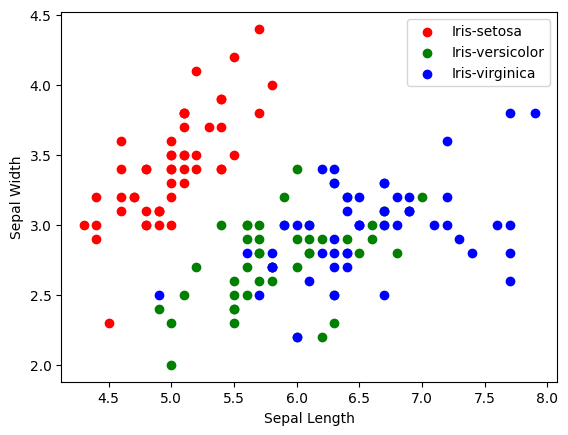

In [13]:
#scatter plots
colors = ['red', 'green', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

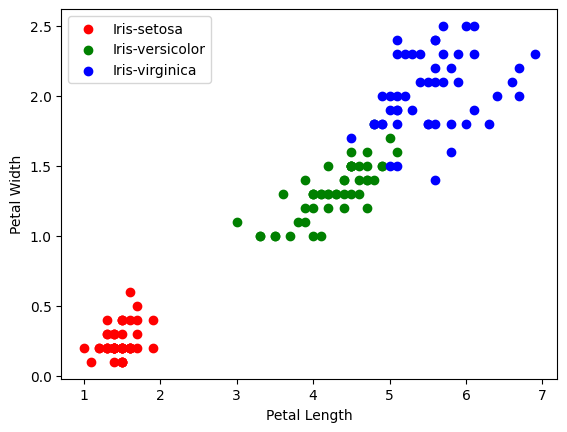

In [14]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

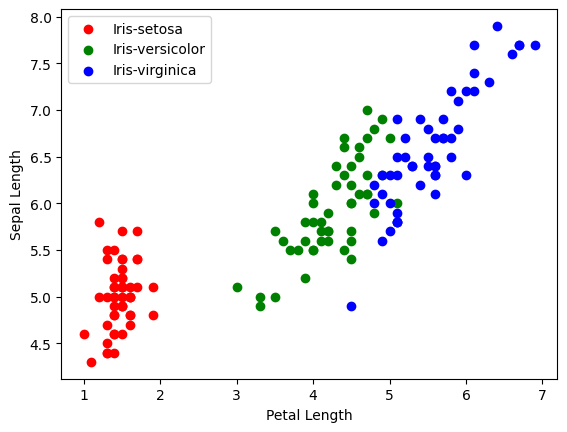

In [15]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['SepalLengthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend()

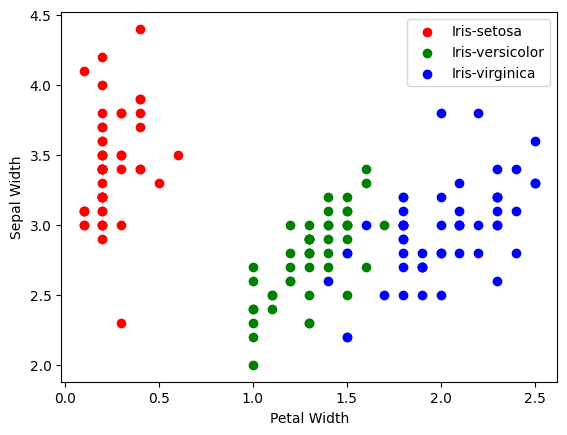

In [16]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalWidthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend()

<Axes: >

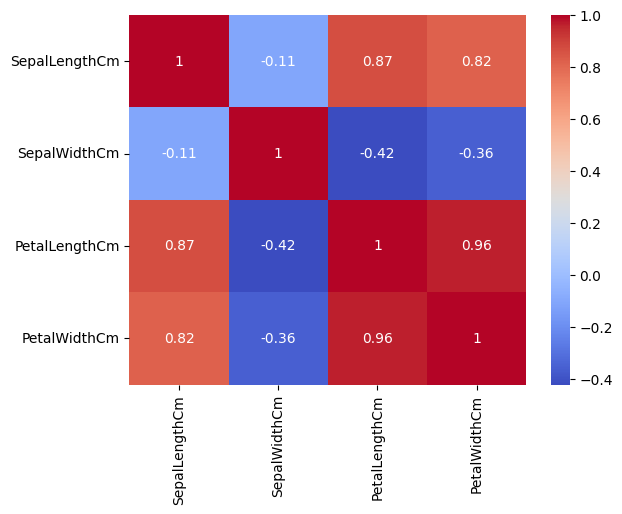

In [17]:
#corelation matrix
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm')

In [25]:
#split the dataset into train, test
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Species'])
print(x.head())
y = df['Species']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(xTrain.values, yTrain)
print('Accuracy', model.score(xTest.values, yTest) * 100)

Accuracy 90.0


In [27]:
#K Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xTrain.values, yTrain)
print('Accuracy', model.score(xTest.values, yTest) * 100)

Accuracy 93.33333333333333


In [28]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xTrain.values, yTrain)
print('Accuracy', model.score(xTest.values, yTest) * 100)

Accuracy 90.0


In [29]:
#Saving the model
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [30]:
#load the model
loadModel = pickle.load(open(filename, 'rb'))

In [32]:
#predict using unseen data
loadModel.predict([[6.0, 2.2, 4.0, 1.0]])[0]

'Iris-versicolor'